In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer,OneHotEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# check the shape of dataset
df.shape

(891, 12)

In [5]:
## checking datatypes
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
## Getting Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


We can see from above information table:

1-- Null values present in cabin,Embarked and Age columns.


In [7]:
# Checking null values
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


It shows that Cabin consist 77% of Null Data.

We can drop this columns as we have very High percenatage of Null values."

<AxesSubplot:title={'center':'Null values Heatmap'}>

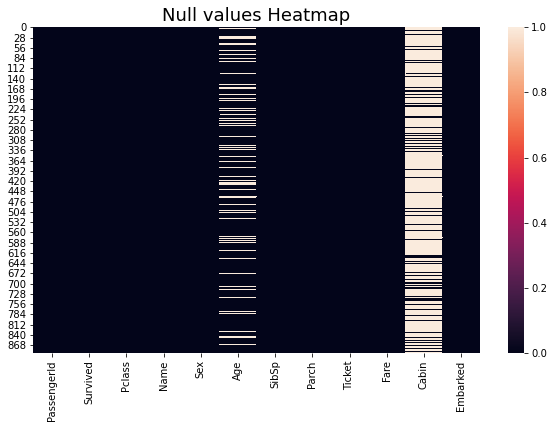

In [10]:
plt.figure(figsize=(10,6))
plt.title('Null values Heatmap',fontsize=18)
sns.heatmap(df.isnull())

In [11]:
# Statistical Summary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Age is normally distributed and have missing values, but fare is right skewed 

outliers could also present in fare Attribute also.

<AxesSubplot:title={'center':'Correlation Heatmap'}>

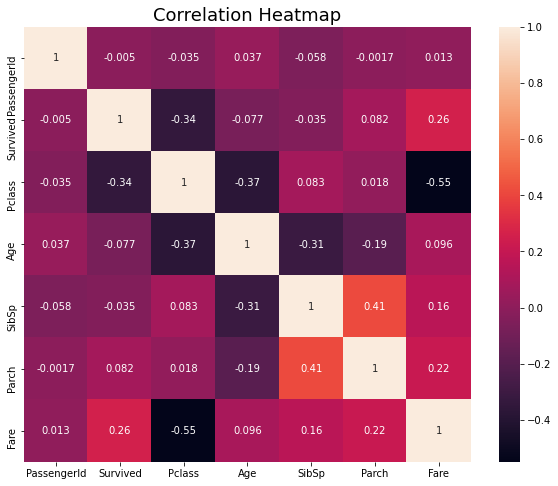

In [12]:
## Correlation
plt.figure(figsize=(10,8))
plt.title('Correlation Heatmap',fontsize=18)
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:title={'center':'Correlation With target'}>

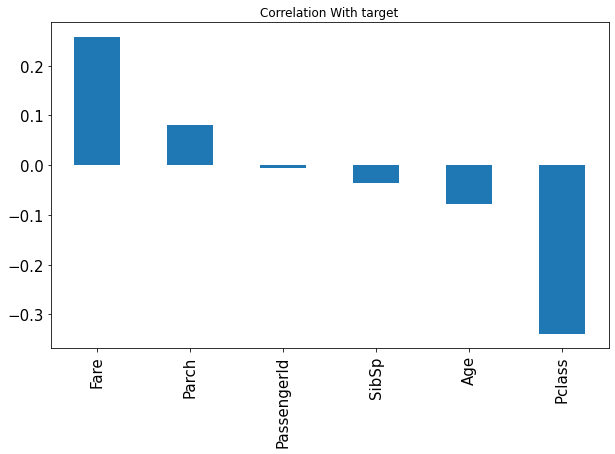

In [13]:

df.corr()['Survived'].sort_values(ascending=False).drop(['Survived']).plot.bar(figsize=(10,6),title='Correlation With target',fontsize=15)


we can see that Fare and Parch are postively correlated with Survived columns

Passengerid has no significance to predict whether person had survived or not.

Sibsp,Age and are negatively correlated to our Survived column.

Pclass have a inverse impact on survived attribute, as Pclass is highly negatively correlated with Target.

In [14]:
## checking value counts for Embarked attribute
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [15]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:

df['Age']=df['Age'].fillna(df['Age'].mean()) ## Age is normally distributed so we impute mean value
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0]) ## Embarked is object data type. we will put mode of the given category.

In [17]:
## we will drop non significant attributed for our Target Attribute such as passengerID, Name, Ticket.
df=df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

In [18]:
##  Again Checking misssing values
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


# EDA

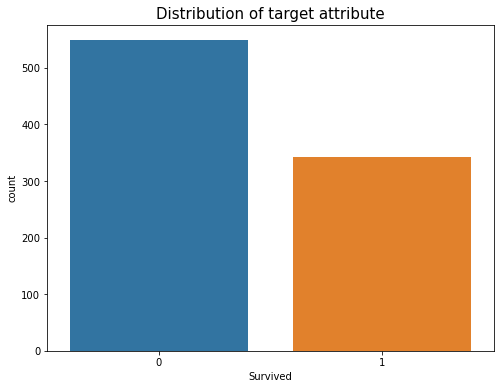

In [20]:
plt.figure(figsize=(8,6))
plt.title('Distribution of target attribute',fontsize=15)
sns.countplot(df['Survived'],data=df)
plt.show()

This shows that our Target attribute is not imbalanced

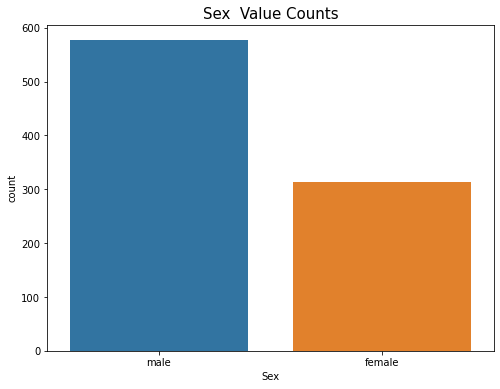

In [21]:
plt.figure(figsize=(8,6))
plt.title('Sex  Value Counts',fontsize=15)
sns.countplot(df['Sex'],data=df)
plt.show()


In our dataset we can see that Number of male passengers are higher than the Female passenger

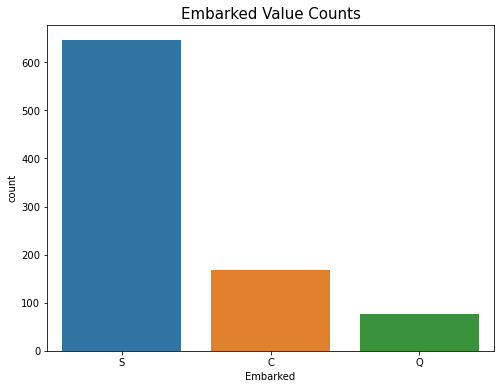

In [22]:
plt.figure(figsize=(8,6))
plt.title('Embarked Value Counts',fontsize=15)
sns.countplot(df['Embarked'],data=df)
plt.show()

Most of passengers were get on ship from S = Southampton

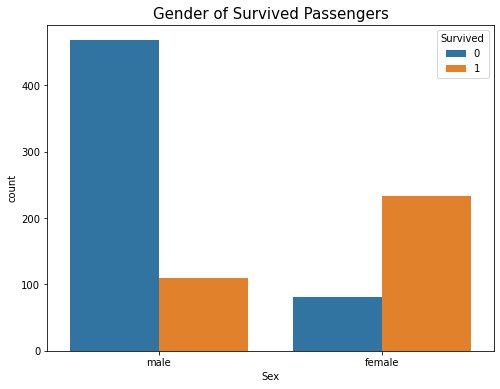

In [23]:
plt.figure(figsize=(8,6))
plt.title('Gender of Survived Passengers',fontsize=15)
sns.countplot(df['Sex'],hue='Survived',data=df)
plt.show()

We can see that , female were survived mostly.

It could be happen that at last moment they took decision that they will send children and mothers on life boat.

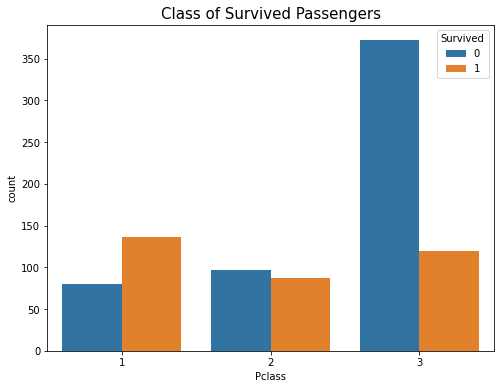

In [24]:
plt.figure(figsize=(8,6))
plt.title('Class of Survived Passengers',fontsize=15)
sns.countplot(df['Pclass'],hue='Survived',data=df)
plt.show()

1-we can see that, the wealthy people who belongs to class 1 survived mostly.

2- On the other hand , people who bought ticket of 3rd class , died mostly.

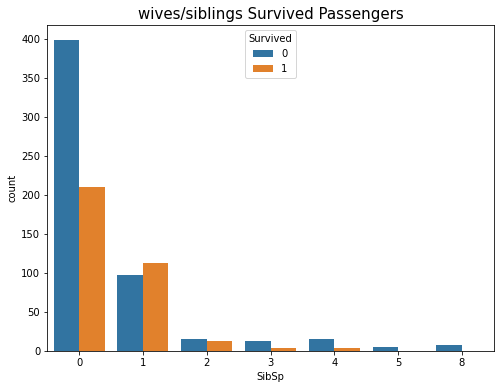

In [25]:
plt.figure(figsize=(8,6))
plt.title('wives/siblings Survived Passengers',fontsize=15)
sns.countplot(df['SibSp'],hue='Survived',data=df)
plt.show()

we can see that families with either 0 or one siblings are survived more.

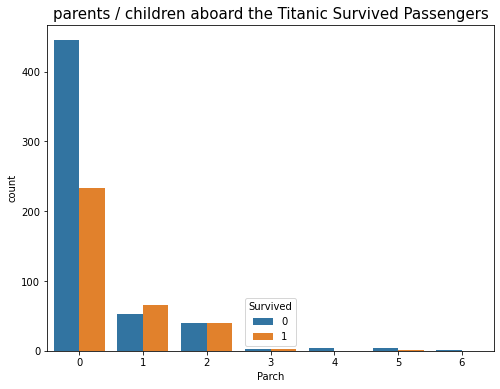

In [26]:
plt.figure(figsize=(8,6))
plt.title('parents / children aboard the Titanic Survived Passengers',fontsize=15)
sns.countplot(df['Parch'],hue='Survived',data=df)
plt.show()

we can see the similer trend as above. people who travel alone have highest chance for survival.



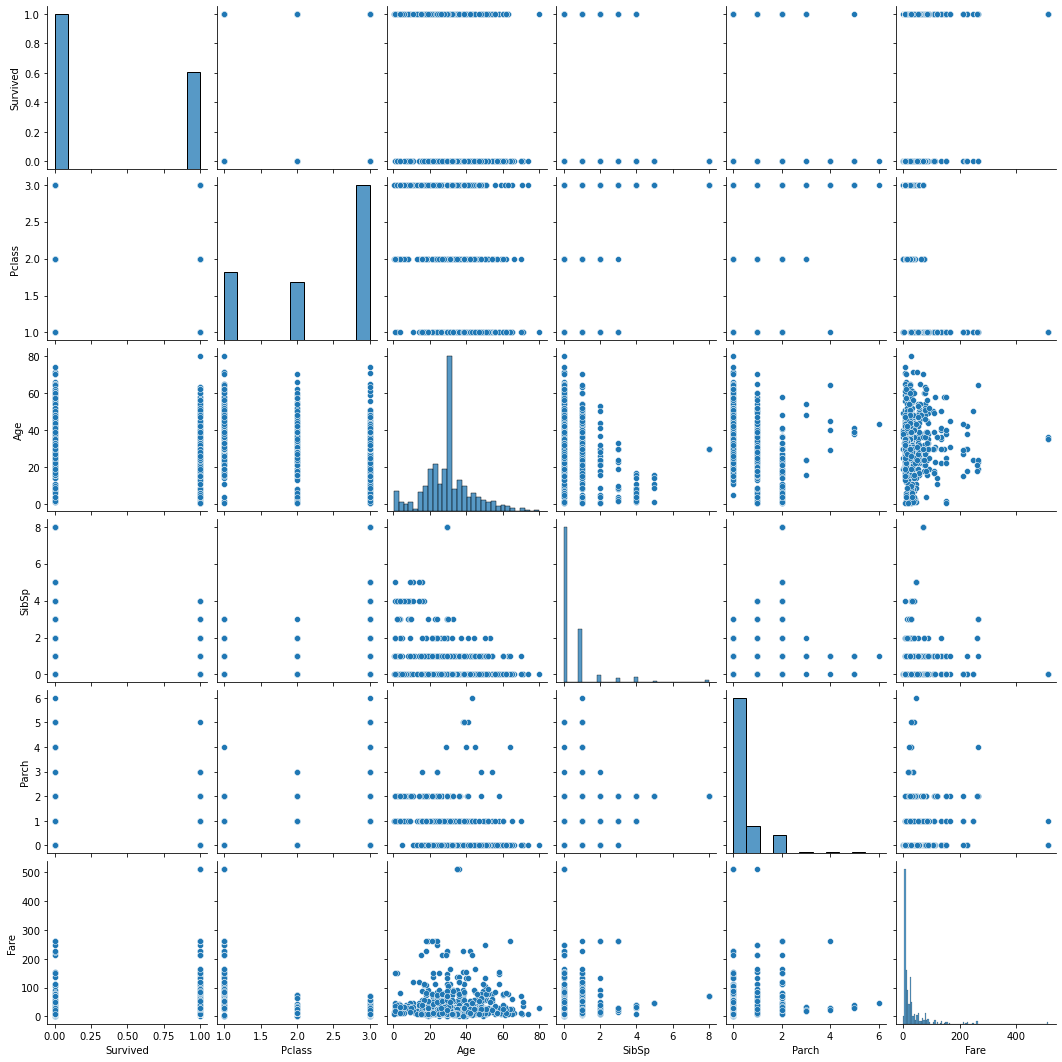

In [27]:
## Let's plot the pairplot for our dataframe.
sns.pairplot(df)

# Checking Distribution

In [28]:
new =df.select_dtypes(['int64' , 'float64'])
new.keys()

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

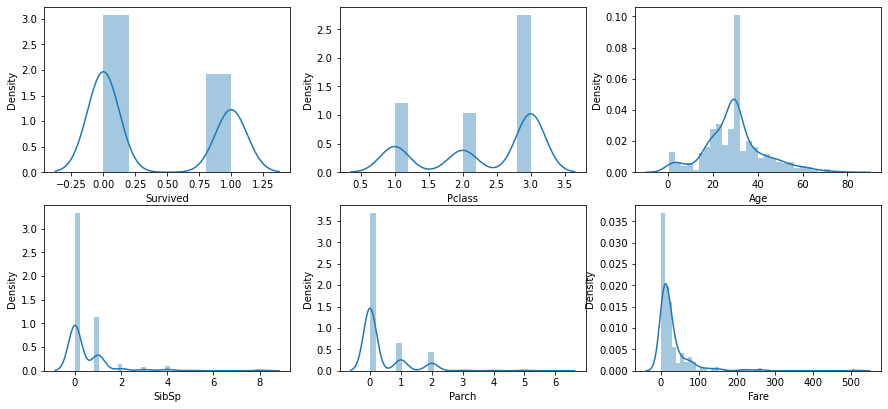

In [29]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(new.keys()):
    plt.subplot(4,3,index+1)
    sns.distplot(df[colum])
    plt.xlabel(colum)
plt.show()


1-Here Survived, Pclass,Sibsp,Parch are encoded labels so we don't need to perform any operation here.

2-Age anf fare only float datatype in which Age i normally distributed but Fare is Right skewed.

# Checking for outliers

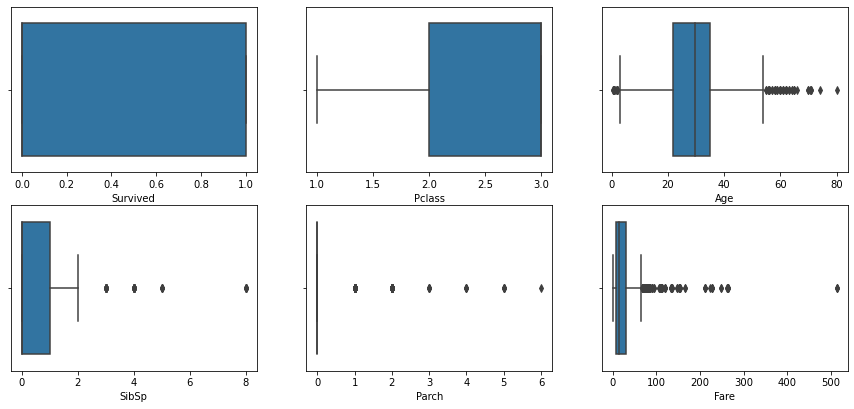

In [30]:
plt.figure(figsize=(15,14))
for index,colum in enumerate(new.keys()):
    plt.subplot(4,3,index+1)
    sns.boxplot(df[colum])
    plt.xlabel(colum)
plt.show()

- If we see the Age and fare, We can see that Outliers in Age are very near to the uppper & Lower Whisker.

- We can perform different operations here to handle these outliers.

In [31]:
# since our colums are skewed we are performing winsorization Technique to remove outliers

<AxesSubplot:xlabel='Age', ylabel='Density'>

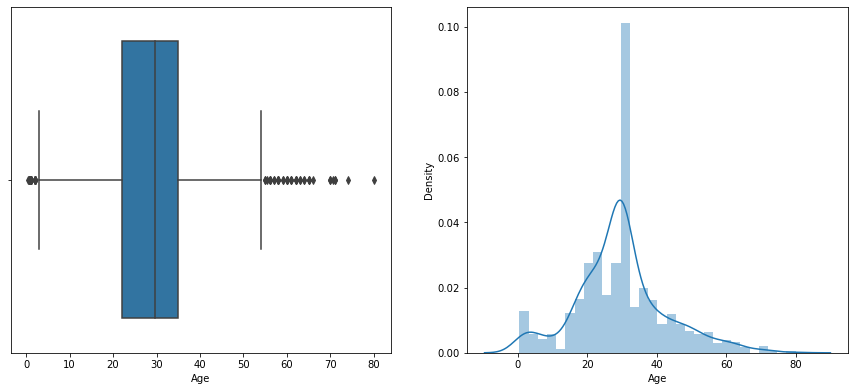

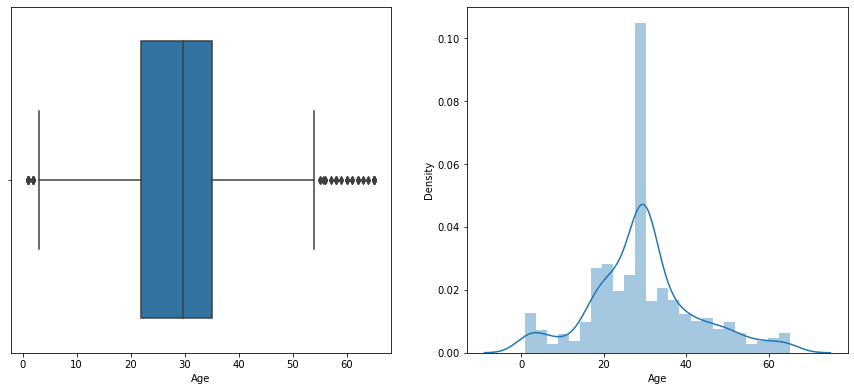

In [32]:
plt.figure(figsize=(15,14))
plt.subplot(2,2,1)
sns.boxplot(df["Age"])
plt.subplot(2,2,2)
sns.distplot(df["Age"])


upper_limit = df["Age"].quantile(.99)
lower_limit = df["Age"].quantile(.01)
df["Age"] = np.where(df["Age"] > upper_limit , upper_limit ,np.where(df["Age"] < lower_limit , lower_limit , df["Age"]))


plt.figure(figsize=(15,14))
plt.subplot(2,2,1)
sns.boxplot(df["Age"])
plt.subplot(2,2,2)
sns.distplot(df["Age"])


<AxesSubplot:xlabel='Age', ylabel='Density'>

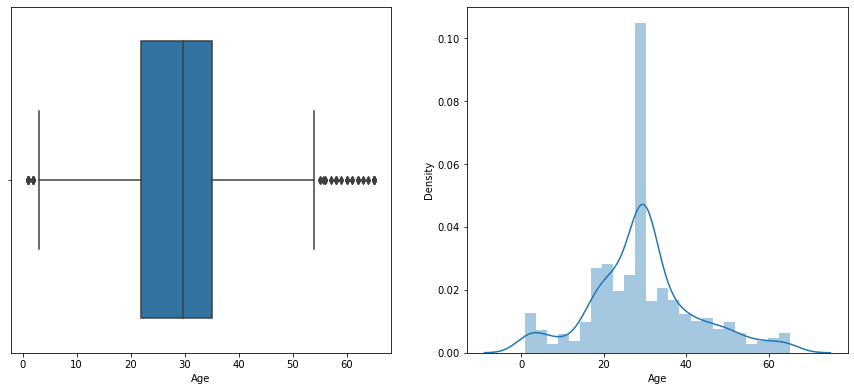

In [33]:
plt.figure(figsize=(15,14))
plt.subplot(2,2,1)
sns.boxplot(df["Age"])
plt.subplot(2,2,2)
sns.distplot(df["Age"])


<AxesSubplot:xlabel='Fare', ylabel='Density'>

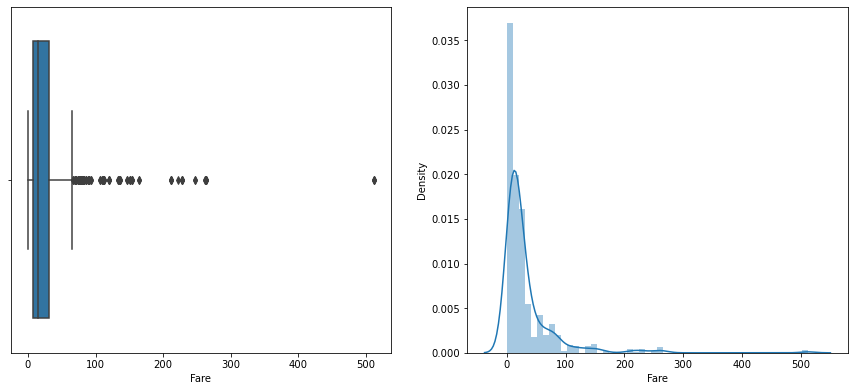

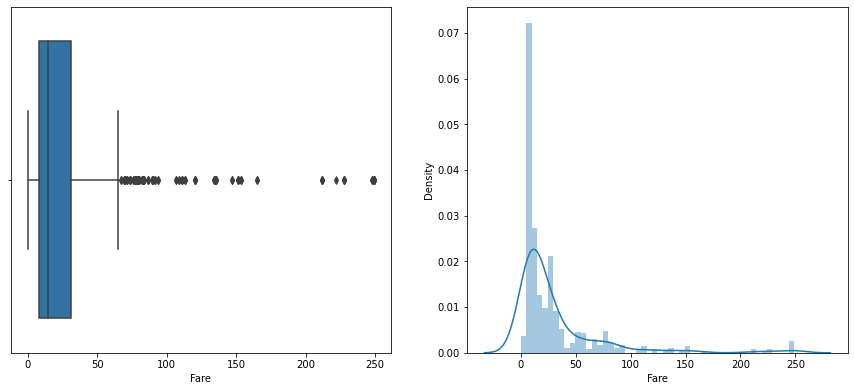

In [34]:
plt.figure(figsize=(15,14))
plt.subplot(2,2,1)
sns.boxplot(df["Fare"])
plt.subplot(2,2,2)
sns.distplot(df["Fare"])


upper_limit = df["Fare"].quantile(.99)
lower_limit = df["Fare"].quantile(.01)
df["Fare"] = np.where(df["Fare"] > upper_limit , upper_limit ,np.where(df["Fare"] < lower_limit , lower_limit , df["Fare"]))


plt.figure(figsize=(15,14))
plt.subplot(2,2,1)
sns.boxplot(df["Fare"])
plt.subplot(2,2,2)
sns.distplot(df["Fare"])


In [35]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Age         0.335807
SibSp       3.695352
Parch       2.749117
Fare        3.112335
dtype: float64

# Transformation

Text(0.5, 1.0, 'QQ plot Before Transformation')

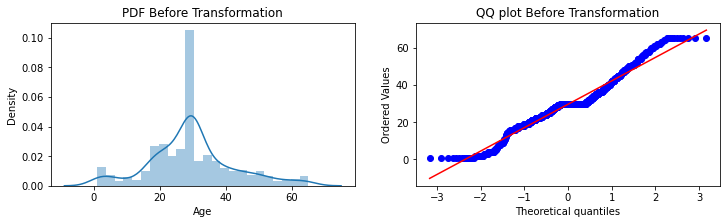

In [36]:
from scipy import stats
plt.figure(figsize=(12,3))
plt.subplot(2,3,1)
plt.subplot(1,2,1)
sns.distplot(df["Age"])
plt.title('PDF Before Transformation')
plt.subplot(1,2,2)
stats.probplot(df["Age"], dist="norm", plot=plt)
plt.title('QQ plot Before Transformation')

Age seems to be almost normally distributed hence we do not perform any transformation on Age

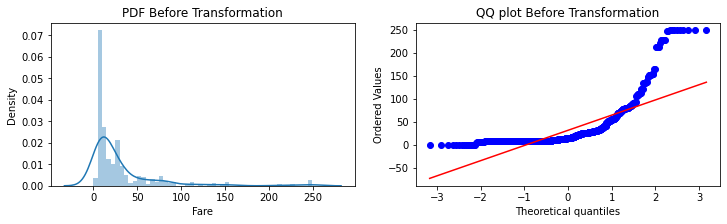

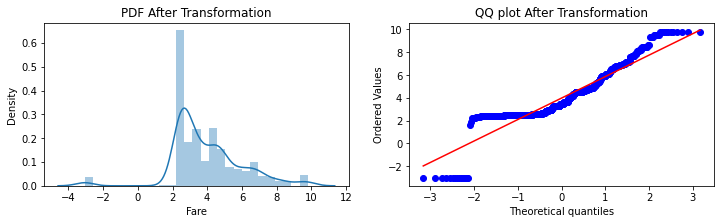

In [37]:
plt.figure(figsize=(12,3))
plt.subplot(2,3,1)
plt.subplot(1,2,1)
sns.distplot(df["Fare"])
plt.title('PDF Before Transformation')
plt.subplot(1,2,2)
stats.probplot(df["Fare"], dist="norm", plot=plt)
plt.title('QQ plot Before Transformation')
df["Fare"],params = stats.boxcox(df["Fare"]+0.01)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot(df["Fare"])
plt.title('PDF After Transformation')
plt.subplot(1,2,2)
stats.probplot(df["Fare"], dist="norm", plot=plt)
plt.title('QQ plot After Transformation')
plt.show()

In fare column we performed BoxCox transformation

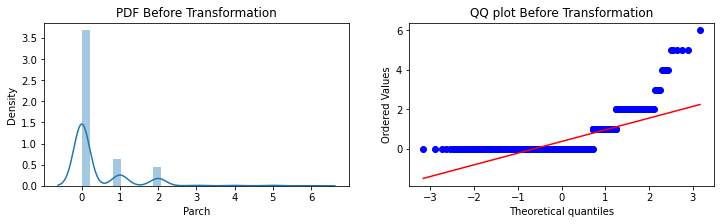

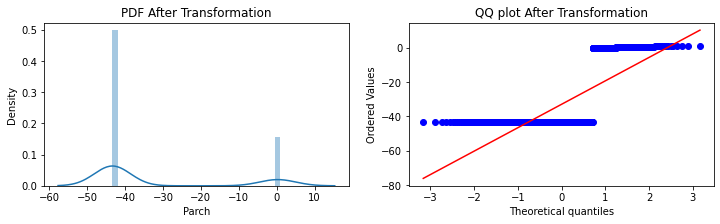

In [38]:
plt.figure(figsize=(12,3))
plt.subplot(2,3,1)
plt.subplot(1,2,1)
sns.distplot(df["Parch"])
plt.title('PDF Before Transformation')
plt.subplot(1,2,2)
stats.probplot(df["Parch"], dist="norm", plot=plt)
plt.title('QQ plot Before Transformation')
df["Parch"],params = stats.boxcox(df["Parch"]+0.01)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot(df["Parch"])
plt.title('PDF After Transformation')
plt.subplot(1,2,2)
stats.probplot(df["Parch"], dist="norm", plot=plt)
plt.title('QQ plot After Transformation')
plt.show()

Perfromed Boxcox on Parch column

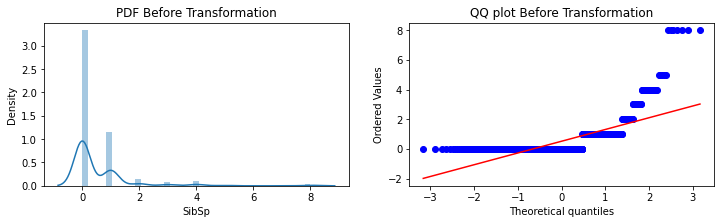

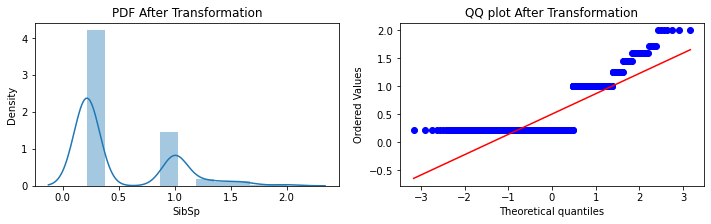

In [39]:
plt.figure(figsize=(12,3))
plt.subplot(2,3,1)
plt.subplot(1,2,1)
sns.distplot(df["SibSp"])
plt.title('PDF Before Transformation')
plt.subplot(1,2,2)
stats.probplot(df["SibSp"], dist="norm", plot=plt)
plt.title('QQ plot Before Transformation')
df["SibSp"] = np.cbrt(df["SibSp"]+0.01)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot(df["SibSp"])
plt.title('PDF After Transformation')
plt.subplot(1,2,2)
stats.probplot(df["SibSp"], dist="norm", plot=plt)
plt.title('QQ plot After Transformation')
plt.show()

Performed cuberoot transform on sibsp column

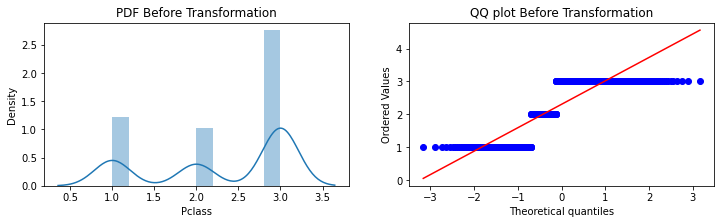

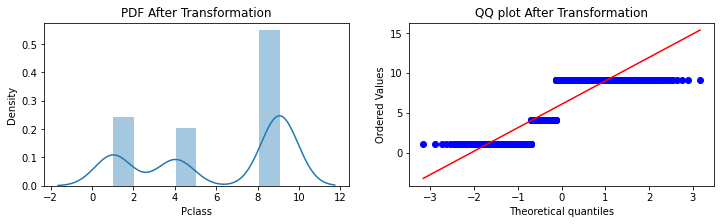

In [40]:
plt.figure(figsize=(12,3))
plt.subplot(2,3,1)
plt.subplot(1,2,1)
sns.distplot(df["Pclass"])
plt.title('PDF Before Transformation')
plt.subplot(1,2,2)
stats.probplot(df["Pclass"], dist="norm", plot=plt)
plt.title('QQ plot Before Transformation')
df["Pclass"] = np.square(df["Pclass"]+0.01)
plt.figure(figsize=(12,3))
plt.subplot(1,2,1)
sns.distplot(df["Pclass"])
plt.title('PDF After Transformation')
plt.subplot(1,2,2)
stats.probplot(df["Pclass"], dist="norm", plot=plt)
plt.title('QQ plot After Transformation')
plt.show()

performed square transform on Pclass column

In [41]:
df.skew()

Survived    0.478523
Pclass     -0.444884
Age         0.335807
SibSp       1.159627
Parch       1.225907
Fare        0.230894
dtype: float64

skewness after transformation

In [42]:
df.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,9.0601,male,22.0,1.003322,-43.335524,2.411734,S
1,1,1.0201,female,38.0,1.003322,-43.335524,6.603643,C
2,1,9.0601,female,26.0,0.215443,-43.335524,2.542860,S


In [43]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,9.0601,male,22.000000,1.003322,-43.335524,2.411734,S
1,1,1.0201,female,38.000000,1.003322,-43.335524,6.603643,C
2,1,9.0601,female,26.000000,0.215443,-43.335524,2.542860,S
3,1,1.0201,female,35.000000,1.003322,-43.335524,5.954906,S
4,0,9.0601,male,35.000000,0.215443,-43.335524,2.566145,S
...,...,...,...,...,...,...,...,...
886,0,4.0401,male,27.000000,0.215443,-43.335524,3.314335,S
887,1,1.0201,female,19.000000,0.215443,-43.335524,4.796872,S
888,0,9.0601,female,29.699118,1.003322,0.540494,4.335166,S
889,1,1.0201,male,26.000000,0.215443,-43.335524,4.796872,C


# Splitting data

In [44]:
X=df.drop(['Survived'],axis=1)
y=df[['Survived']]

In [45]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,9.0601,male,22.000000,1.003322,-43.335524,2.411734,S
1,1.0201,female,38.000000,1.003322,-43.335524,6.603643,C
2,9.0601,female,26.000000,0.215443,-43.335524,2.542860,S
3,1.0201,female,35.000000,1.003322,-43.335524,5.954906,S
4,9.0601,male,35.000000,0.215443,-43.335524,2.566145,S
...,...,...,...,...,...,...,...
886,4.0401,male,27.000000,0.215443,-43.335524,3.314335,S
887,1.0201,female,19.000000,0.215443,-43.335524,4.796872,S
888,9.0601,female,29.699118,1.003322,0.540494,4.335166,S
889,1.0201,male,26.000000,0.215443,-43.335524,4.796872,C


In [46]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Model Selection

In [47]:
def max_accuracy_score(pipe,X,y):
    max_accuracy=0
    for i in range(42,100):
        X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.20,random_state=i,stratify=y)
        pipe.fit(X_train,y_train)
        y_pred=pipe.predict(X_test)
        accuracy_check=accuracy_score(y_test,y_pred)
        if accuracy_check>max_accuracy:
            max_accuracy=accuracy_check
            final_r=i
    print('max Accuracy score corresponding to',final_r,'is',max_accuracy)
    print('')
    print('cross validation score',cross_val_score(pipe,X,y,scoring='accuracy').mean())
    print('')
    print('Standard Deviation',cross_val_score(pipe,X,y,scoring='accuracy').std())
    print('')
    print('Training accuracy',pipe.score(X_train,y_train))
    print('')
    print('Test Accuracy',pipe.score(X_test,y_test))
    print('')
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred))
    print('')
    print('Classification Report',classification_report(y_test,y_pred))
    print('')
    print('Roc_auc Score',roc_auc_score(y_test,y_pred))
    return final_r

# Pipeline

# LogisticRegression

In [48]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = LogisticRegression()


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [49]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 90 is 0.8435754189944135

cross validation score 0.7923921913250893

Standard Deviation 0.02164337330022698

Training accuracy 0.7963483146067416

Test Accuracy 0.7932960893854749

Confusion Matrix
[[90 20]
 [17 52]]

Classification Report               precision    recall  f1-score   support

           0       0.84      0.82      0.83       110
           1       0.72      0.75      0.74        69

    accuracy                           0.79       179
   macro avg       0.78      0.79      0.78       179
weighted avg       0.80      0.79      0.79       179


Roc_auc Score 0.7859025032938076


90

# Decission Tree

In [50]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = DecisionTreeClassifier()


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [51]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 88 is 0.8268156424581006

cross validation score 0.776743456154667

Standard Deviation 0.038635663311506536

Training accuracy 0.9859550561797753

Test Accuracy 0.7486033519553073

Confusion Matrix
[[83 27]
 [18 51]]

Classification Report               precision    recall  f1-score   support

           0       0.82      0.75      0.79       110
           1       0.65      0.74      0.69        69

    accuracy                           0.75       179
   macro avg       0.74      0.75      0.74       179
weighted avg       0.76      0.75      0.75       179


Roc_auc Score 0.7468379446640316


88

# KNN

In [52]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = KNeighborsClassifier()


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [53]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 99 is 0.8659217877094972

cross validation score 0.8103383340656581

Standard Deviation 0.025615444673169487

Training accuracy 0.8525280898876404

Test Accuracy 0.8659217877094972

Confusion Matrix
[[99 11]
 [13 56]]

Classification Report               precision    recall  f1-score   support

           0       0.88      0.90      0.89       110
           1       0.84      0.81      0.82        69

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179


Roc_auc Score 0.8557971014492755


99

# Naive Bayse

In [54]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = GaussianNB()


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [55]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 73 is 0.8268156424581006

cross validation score 0.7655137781683509

Standard Deviation 0.03849555253028975

Training accuracy 0.7724719101123596

Test Accuracy 0.7653631284916201

Confusion Matrix
[[82 28]
 [14 55]]

Classification Report               precision    recall  f1-score   support

           0       0.85      0.75      0.80       110
           1       0.66      0.80      0.72        69

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.76       179
weighted avg       0.78      0.77      0.77       179


Roc_auc Score 0.771277997364954


73

# Support Vector Classifier


In [56]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = SVC()


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [57]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 45 is 0.8715083798882681

cross validation score 0.8237900947837549

Standard Deviation 0.02031231681177786

Training accuracy 0.8384831460674157

Test Accuracy 0.8603351955307262

Confusion Matrix
[[106   4]
 [ 21  48]]

Classification Report               precision    recall  f1-score   support

           0       0.83      0.96      0.89       110
           1       0.92      0.70      0.79        69

    accuracy                           0.86       179
   macro avg       0.88      0.83      0.84       179
weighted avg       0.87      0.86      0.86       179


Roc_auc Score 0.8296442687747035


45

# random Forest Classifier


In [58]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = RandomForestClassifier()


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [59]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 88 is 0.8603351955307262

cross validation score 0.8103571652752495

Standard Deviation 0.029011021116411455

Training accuracy 0.9859550561797753

Test Accuracy 0.8044692737430168

Confusion Matrix
[[93 17]
 [18 51]]

Classification Report               precision    recall  f1-score   support

           0       0.84      0.85      0.84       110
           1       0.75      0.74      0.74        69

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


Roc_auc Score 0.792292490118577


88

# Adaboost

In [60]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = AdaBoostClassifier()


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [61]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 73 is 0.8715083798882681

cross validation score 0.8014123407193523

Standard Deviation 0.03054493789080039

Training accuracy 0.8286516853932584

Test Accuracy 0.8324022346368715

Confusion Matrix
[[91 19]
 [11 58]]

Classification Report               precision    recall  f1-score   support

           0       0.89      0.83      0.86       110
           1       0.75      0.84      0.79        69

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.83       179
weighted avg       0.84      0.83      0.83       179


Roc_auc Score 0.8339262187088273


73

# gradient Boost


In [62]:
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = GradientBoostingClassifier()


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [63]:
max_accuracy_score(pipe,X,y)

max Accuracy score corresponding to 77 is 0.8715083798882681

cross validation score 0.8226916075575922

Standard Deviation 0.01844562238547011

Training accuracy 0.9002808988764045

Test Accuracy 0.8156424581005587

Confusion Matrix
[[96 14]
 [19 50]]

Classification Report               precision    recall  f1-score   support

           0       0.83      0.87      0.85       110
           1       0.78      0.72      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179


Roc_auc Score 0.7986824769433466


77

Support Vector Classifier is the best performing model hence we select svc for our data.

### Hyperparameter Tuning of Support Vector Classifier


In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=.20)
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = SVC()


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [72]:
param ={'Step3__C': [0.1, 1, 10, 100, 1000], 
              'Step3__gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'Step3__kernel': ["rbf", "sigmoid", "precomputed"],
               'Step3__degree':[1,3,5,7,9,11,13,15]
       }

In [73]:
gridscv = GridSearchCV(pipe, param,scoring='accuracy',n_jobs=-1 )

In [74]:
gridscv.fit(X_train,y_train)

GridSearchCV(estimator=Pipeline(steps=[('Step1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ohe',
                                                                         OneHotEncoder(drop='first'),
                                                                         [1,
                                                                          6])])),
                                       ('Step2',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scl',
                                                                         StandardScaler(),
                                                                         slice(0, 8, None))])),
                                       ('Step3', SVC())]),
             n_jobs=-1,
             param_grid={'Step3__C': [0.1, 1,

In [75]:
gridscv.best_params_

{'Step3__C': 1,
 'Step3__degree': 1,
 'Step3__gamma': 0.1,
 'Step3__kernel': 'rbf'}

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=45,test_size=.20)
step1 = ColumnTransformer([
    ('ohe',OneHotEncoder(drop='first'),[1,6])
],remainder='passthrough')

step2 = ColumnTransformer([
    ('scl',StandardScaler(),slice(0,X.shape[1]+1))
],remainder='passthrough')

step3 = SVC(C=1,degree=1,gamma=0.1,kernel='rbf')


pipe = Pipeline([
    ('Step1',step1),
    ('Step2',step2),
    ('Step3',step3),
])

In [79]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  [1, 6])])),
                ('Step2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scl', StandardScaler(),
                                                  slice(0, 8, None))])),
                ('Step3', SVC(C=1, degree=1, gamma=0.1))])

In [80]:
y_pred = pipe.predict(X_test)

In [81]:
print('Accuracy Score',accuracy_score(y_test,y_pred))
print('\n')
print('Confusion Matrix')
print(confusion_matrix(y_test,y_pred))
print('\n')
print('Classification Report')
print(classification_report(y_test,y_pred))
print('\n')
print('Roc_auc Score',roc_auc_score(y_test,y_pred))

Accuracy Score 0.8603351955307262


Confusion Matrix
[[107  10]
 [ 15  47]]


Classification Report
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       117
           1       0.82      0.76      0.79        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.86      0.86      0.86       179



Roc_auc Score 0.8362972153294734


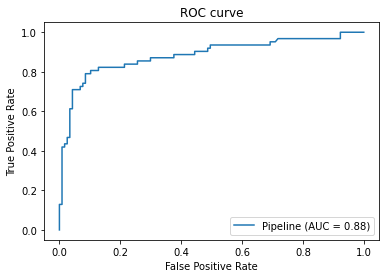

In [87]:
from sklearn import metrics
metrics.plot_roc_curve(pipe, X_test, y_test)
plt.title('ROC curve')
plt.show()


I have generated the ROC Curve for my final model and it shows the AUC score for my final model to be of 88%

# Saving the model

In [89]:
import pickle

In [90]:
pickle.dump(pipe,open('titanic.pkl','wb'))

# Loading pickle file

In [91]:
pkl_file = pickle.load(open('titanic.pkl','rb'))

In [93]:
pkl_file.predict(X_test)

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)